# HSE 2021: Mathematical Methods for Data Analysis

## Seminar 5: Classification metrics

**Authors**: Polina Polunina, Andrey Shestakov



In [ ]:
!pip install wget --quiet

In [57]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#ulr links
import wget
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [58]:
# store the web link in a variable
url = 'https://docs.google.com/uc?export=download&id=1k21iUIrz0NjfiLE_j-oBQm1bNu3wASX6'

# download the file and save its name to a viriable
filename = wget.download(url)

# print the filename
filename

100% [........................................................] 460676 / 460676

'train_home_price.csv'

In [59]:
cols=['Id', 'MSSubClass', 'LotArea', 'OverallQual',\
      'OverallCond', 'YearBuilt', 'YearRemodAdd',\
      'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',\
     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',\
     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',\
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',\
     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',\
     'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [60]:
data = pd.read_csv(filename, index_col=0, usecols=cols)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


Check for Nan values:

In [61]:
data.isna().sum().sum()

0

### Define the model

In [62]:
X = data.drop('SalePrice', axis=1)
Y = data.SalePrice
#add the constant term to the data
X = sm.add_constant(X)
#define the model
model = sm.OLS(Y, X)
#fit the model
results = model.fit()

Calculate some statistical parameters:

In [63]:
#together with the intercept
k = X.shape[1]
#total number of observations
n = X.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of paraters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of paraters to estimate: 31 
 total number of observations: 1460 
 degrees of freedom of the model: 30 
 degrees of freedom of the errors: 1429


Calculate the rank of feature matrix:

In [64]:
np.linalg.matrix_rank(X)

30

In [65]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.804     
Dependent Variable:      SalePrice            AIC:                    34737.9309
Date:                    2022-10-08 02:05     BIC:                    34896.5166
No. Observations:        1460                 Log-Likelihood:         -17339.   
Df Model:                29                   F-statistic:            207.6     
Df Residuals:            1430                 Prob (F-statistic):     0.00      
R-squared:               0.808                Scale:                  1.2357e+09
--------------------------------------------------------------------------------
                 Coef.      Std.Err.      t    P>|t|      [0.025       0.975]   
--------------------------------------------------------------------------------
const         608246.1995 1428003.7488  0.4259 0.6702 -2192960.6498 3409453.0488
MSSubClass      -161.5055      26.4469 -6.1068 0.0000     -213.3845    -109.6266
LotArea            0.3868       0.1016  3.8079 0.0001        0.1875       0.5860
OverallQual    18012.7658    1194.9364 15.0742 0.0000    15668.7495   20356.7821
OverallCond     4425.5378    1031.1020  4.2920 0.0000     2402.9031    6448.1725
YearBuilt        349.4880      61.2239  5.7084 0.0000      229.3896     469.5863
YearRemodAdd     140.9941      66.3557  2.1248 0.0338       10.8292     271.1590
BsmtUnfSF         -9.7412       3.1432 -3.0991 0.0020      -15.9070      -3.5754
TotalBsmtSF       20.5078       4.5849  4.4729 0.0000       11.5140      29.5016
1stFlrSF          18.9417       6.1645  3.0727 0.0022        6.8492      31.0341
2ndFlrSF          19.5079       5.7011  3.4218 0.0006        8.3244      30.6914
LowQualFinSF      -6.7807      14.8869 -0.4555 0.6488      -35.9831      22.4218
GrLivArea         31.6689       5.7075  5.5486 0.0000       20.4729      42.8650
BsmtFullBath    8400.0052    2512.7996  3.3429 0.0009     3470.8365   13329.1738
FullBath        3414.1786    2838.1391  1.2030 0.2292    -2153.1840    8981.5413
HalfBath       -1549.1048    2690.0026 -0.5759 0.5648    -6825.8793    3727.6697
BedroomAbvGr  -10546.9569    1704.6005 -6.1873 0.0000   -13890.7426   -7203.1712
KitchenAbvGr  -12589.7919    5254.5163 -2.3960 0.0167   -22897.1787   -2282.4051
TotRmsAbvGrd    5095.3485    1250.1490  4.0758 0.0000     2643.0258    7547.6713
Fireplaces      3707.1220    1784.0235  2.0780 0.0379      207.5382    7206.7058
GarageCars     10562.3784    2884.3767  3.6619 0.0003     4904.3150   16220.4418
GarageArea         2.1462       9.7916  0.2192 0.8265      -17.0613      21.3537
WoodDeckSF        25.7208       8.0357  3.2008 0.0014        9.9578      41.4838
OpenPorchSF       -6.2873      15.3029 -0.4109 0.6812      -36.3058      23.7312
EnclosedPorch      6.6916      17.0190  0.3932 0.6942      -26.6932      40.0765
3SsnPorch         21.6727      31.6870  0.6840 0.4941      -40.4854      83.8308
ScreenPorch       55.1441      17.3306  3.1819 0.0015       21.1479      89.1403
PoolArea         -42.4124      23.8035 -1.7818 0.0750      -89.1059       4.2810
MiscVal           -0.8946       1.8753 -0.4770 0.6334       -4.5731       2.7840
MoSold          -111.5227     348.4163 -0.3201 0.7490     -794.9846     571.9391
YrSold          -817.2240     709.7266 -1.1515 0.2497    -2209.4410     574.9931
--------------------------------------------------------------------------------
Omnibus:               540.774        Durbin-Watson:           1.961            
Prob(Omnibus):         0.000          Jarque-Bera (JB):        95836.983        
Skew:                  -0.553         Prob(JB):                0.000            
Kurtosis:              42.676         Condition No.:           13129423541445030
================================================================================
* The c

**Resuls explanation:**

* $R^2 = 0.808$
* $R^2_{adj} = 0.804$
* Log-Likelihood = -1733 - A value of Likelihood function in the optimal point
* AIC = 34738 - Akaike information criterion, is used for model selection purposes. Preferred model is the one with the minimum AIC value
* BIC = 34897 - Bayesian information criterion, the same purposes as for AIC
* F-statistic = 208

**F- Test for the overall model significance**:

$H_{0}$ : The fit of intercept only model and the current model is same. i.e. Additional variables do not provide value taken together

$H_{1}$ : The fit of intercept only model is significantly less compared to our current model. i.e. Additional variables do make the model significantly better.

$F = \frac{R^2/(k-1)}{(1-R^2)/(n-k)}$,

where $k$ - the number of variables (with intercept term), $n$ - the number of observations


If the calculated F-value is greater than the F value from the statistical table, than we can reject the $H_{0}$ hypothesis

* Prob(F-statistic) = 0.0 - P-value for F-test
* Df model - degrees of freedom of the model
* Df Residuals - degrees of freedom of the errors

**Note:** don't be confused with the values of Df (!). THe true values is calculated above. In this specific realization of OLS, DF model is calculated as a rank of the X matrix, which equals to 29

* Scale - squared standard error of the regression

* Durbin-Watson = 1.96; DW is a test for autocorrelation of the errors. DW value always lies between 0 and 4. If , DW << 2 there is a positive serial correlation, if DW >> 2 - there is a negative correlation


**Note:** not all the variables are significant. What should we do next? There is a number of methods (a.k.a. Feature engineering):

* **Elimination by P-value:**

Build a model using a full set of features. Then, eliminate the insignificant features sequentially starting from the one with the highest P-value

* **Forward elimination:**

Build all possible regression models with a single predictor and pick the best one. Then try all possible models that include that best predictor plus a second predictor. Pick the best of those. You keep adding one feature at a time, and you stop when your model no longer improves or starts worsening. 

* **Backward elimination:**

Build a regression model that includes a full set of predictors. Next, gradually remove one at a time according to the predictor whose removal makes the biggest improvement. You stop removing predictors when the removal makes the predictive model worsen.

## Multiple regression with sklearn

* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "classical" linear regression with MSE. Exact solution: $w^* = (X^TX)^{-1}X^Ty$
* [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) &mdash; linear regression with MSE optimization and $\ell_2$-regularization
* [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) &mdash; linear regression with MSE optimization and $\ell_1$-regularization

## Regularization

* Insert additional requirement for regularizer $R(\beta)$ to be small:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{\beta}
$$
* $\lambda>0$ - hyperparameter.
* $R(\beta)$ penalizes complexity of models.
$$
\begin{array}{ll}
R(\beta)=||\beta||_{1} &  \mbox{(L1) Lasso regression}\\
R(\beta)=||\beta||_{2}^{2} & \text{(L2) Ridge regression}
\end{array}
$$

<img src="https://drive.google.com/uc?id=1WIONg5WAtiV4jKjmOA2Zn_B4uPAVPp6y" width=70%>

* Not only **accuracy** matters for the solution but also **model simplicity**!
* $\lambda$ controls complexity of the model:$\uparrow\lambda\Leftrightarrow\text{complexity}$$\downarrow$.


### Types of regularization: Ridge regression

Ridge regression minimizes a slightly different function:

$$\Large J(X, y, \beta) = \mathcal{L} + \lambda \sum_j\beta_j^2$$

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $\lambda \sum_j\beta_j^2$ is calles $l_2$ penalty


where $\lambda ≥ 0$ is a tuning parameter, to be determined separately. As with least squares, ridge regression seeks coefficient estimates that fit the data well, by making the RSS small. However, the second term, $\lambda |\beta|^2$ , called a *shrinkage penalty*, is small when betas are close to zero, and so it has the effect of shrinking penalty the estimates of $\beta_j$ towards zero. The tuning parameter $\lambda$ serves to control
the relative impact of these two terms on the regression coefficient estimates. When $\lambda = 0$, the penalty term has no effect, and ridge regression will produce the least squares estimates. However, as $\lambda$ increases the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach zero.

### Types of Regularization: Lasso regression

Ridge regression does have one obvious disadvantage. It does not do feature selection. Ridge regression
will include all p predictors in the final model. The penalty $\lambda |\beta|^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero. This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation in settings in which the number of variables p is quite large. 

The lasso is an alternative to ridge regression that overcomes this disadvantage. The lasso minimizes the following function:


$$\Large J(X, y, \beta) = \mathcal{L} + \lambda \sum_j|\beta_j|$$

- $\mathcal{L}$ is the logistic loss function summed over the entire dataset
- $\lambda \sum_j|\beta_j|$ is calles $l_1$ penalty

The lasso and ridge regression have similar formulations. The only difference is that the $\lambda\sum_j\beta_j^2 $ term in the ridge regression penalty has been replaced by $\lambda\sum_j|\beta_j|$ in the lasso penalty.

As with ridge regression, the lasso shrinks the coefficient estimates towards zero. However, in the case of the lasso, the penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when
the tuning parameter $\lambda$ is sufficiently large. Hence, much like best subset selection, the lasso performs *variable selection*.

In [66]:
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,150,856,856,854,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,284,1262,1262,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,434,920,920,866,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,540,756,961,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,490,1145,1145,1053,...,192,84,0,0,0,0,0,12,2008,250000


#### L2 regularization

In [67]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('SalePrice', axis=1), data.SalePrice, test_size=0.33, random_state=42
)

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1614154736.5663
Train MSE = 1118176485.6748


### Cross-Validation

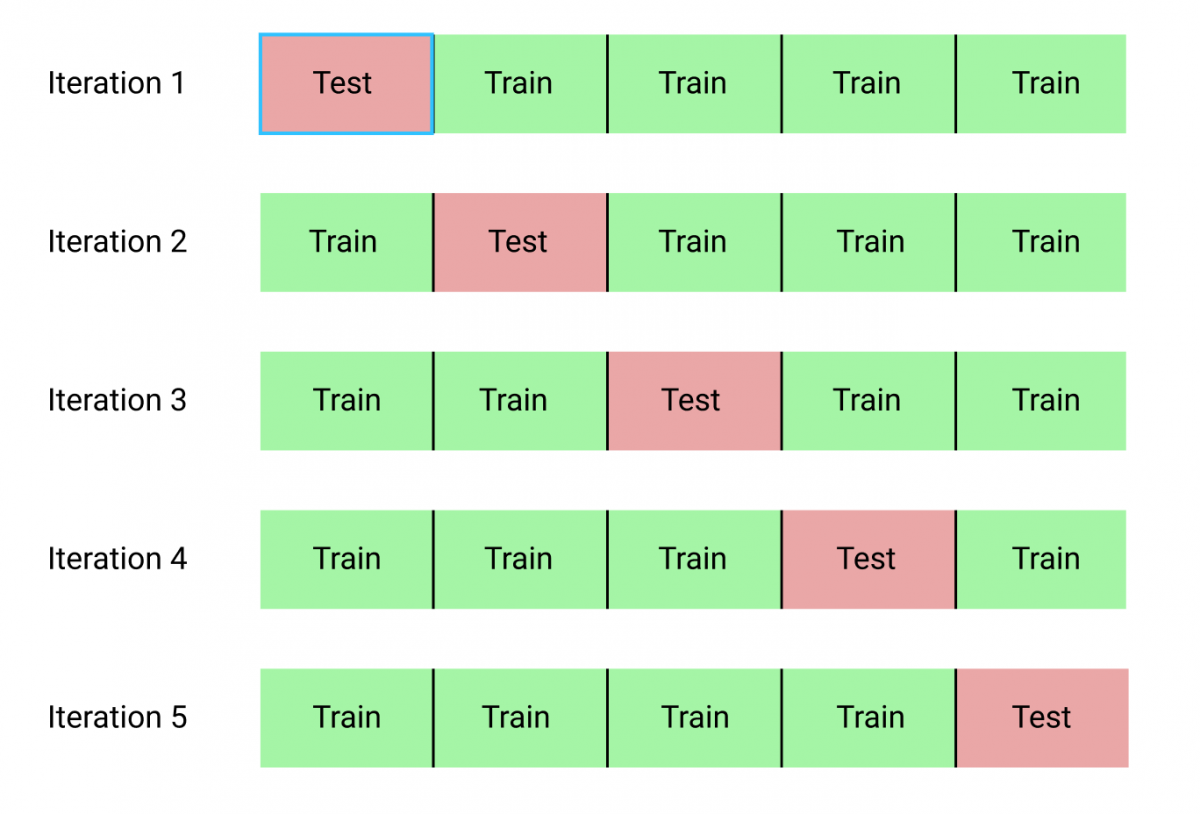

In [68]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 1479384499.2952
	2503090058.5411
	1201178649.8985
	694202047.1882
	2348370475.1935
Mean CV MSE = 1645245146.0233


In [69]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

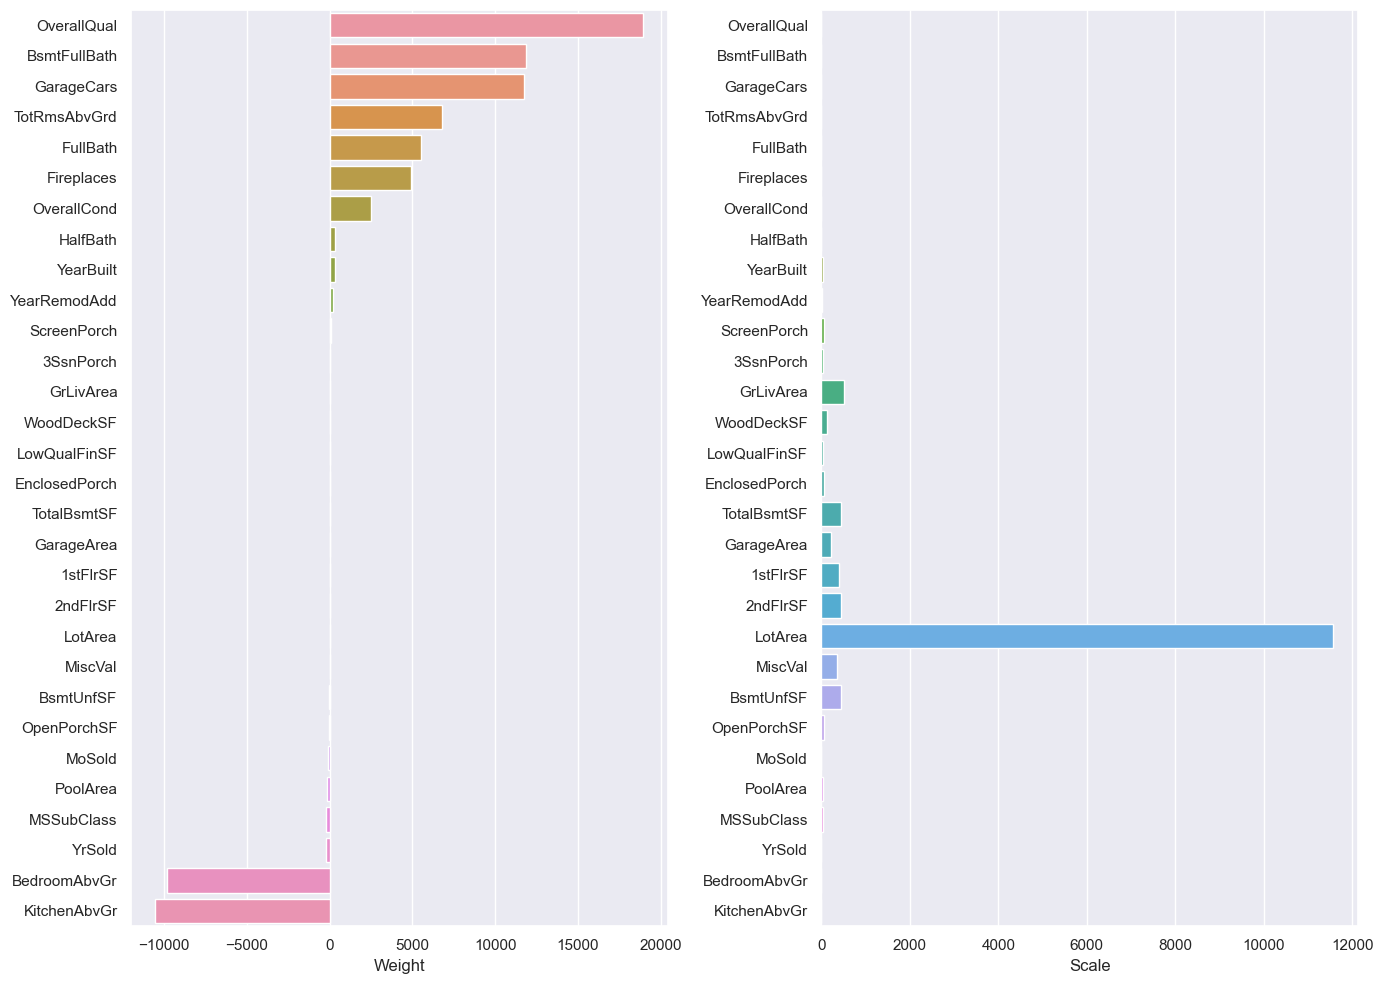

In [70]:
show_weights(X_train.columns, model.coef_, X_train.std())

### Feature Transform

[`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
#Do we need this here?

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1614337582.6718
Train MSE = 1118171436.8603


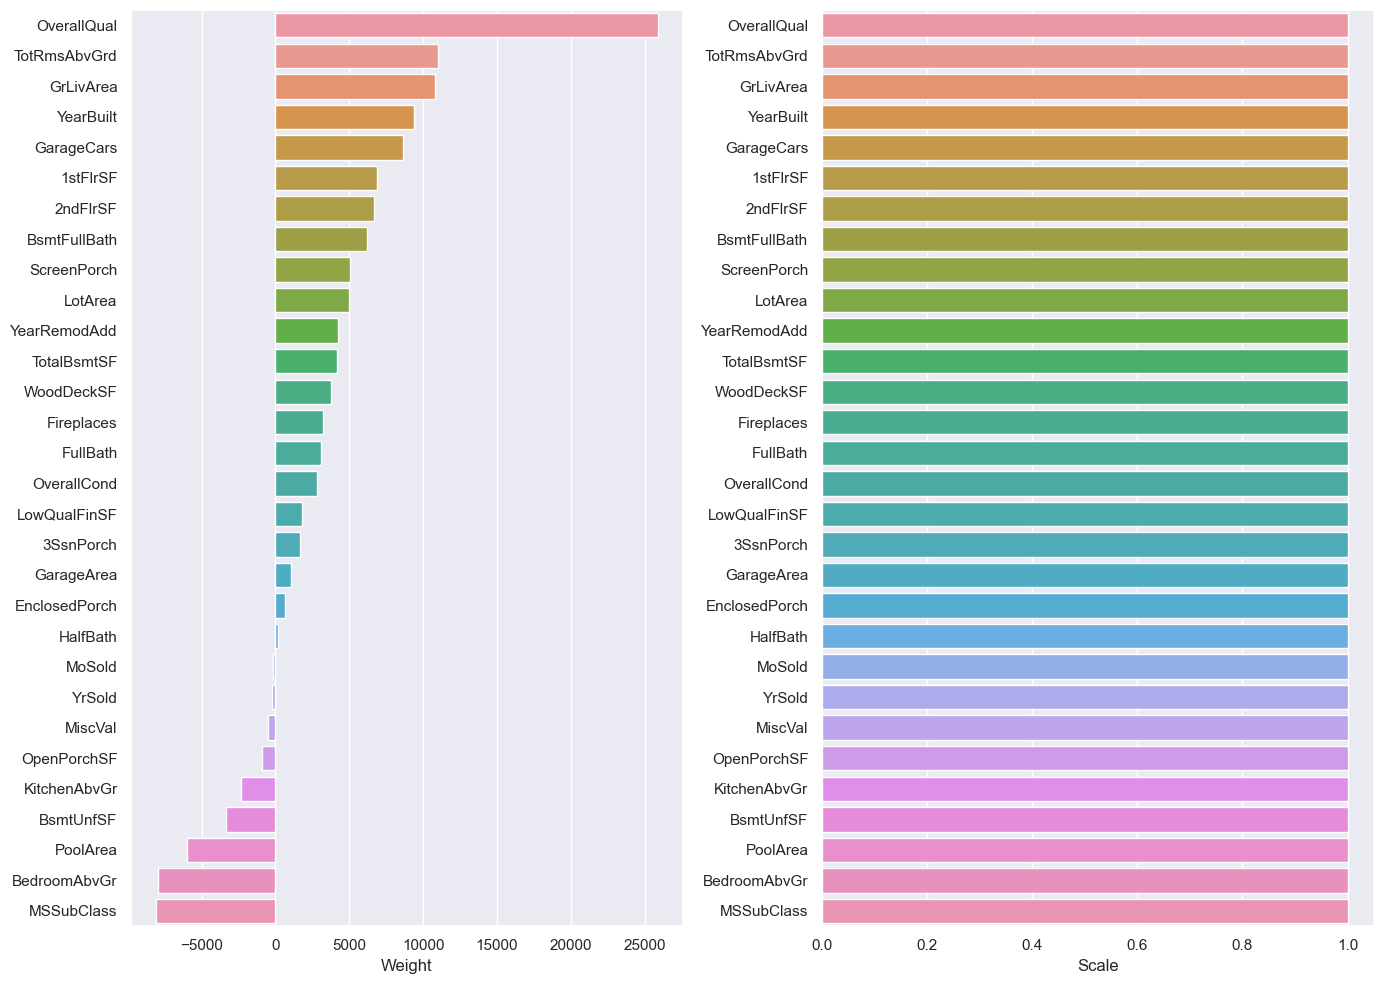

In [72]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=X_train.columns)
show_weights(X_train.columns, model.coef_, scales)

### GridSearch

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

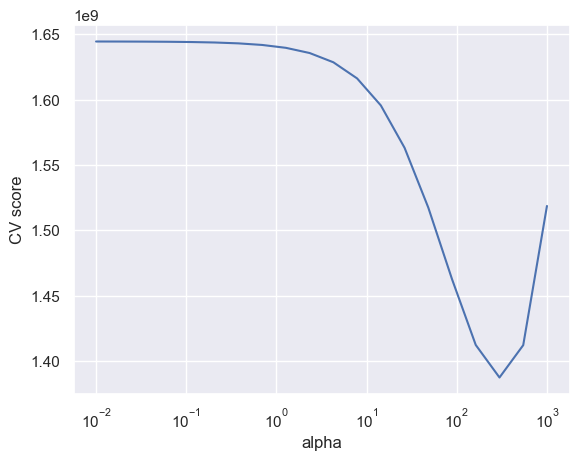

In [73]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], 
                        scoring="neg_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

**Question**: Why don't we choose the regularization coefficient by train or test sets?

### l1 regularization

In [74]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % mean_squared_error(y_test, y_pred))

RMSE = 1614473738.4383


#### residuals distribution

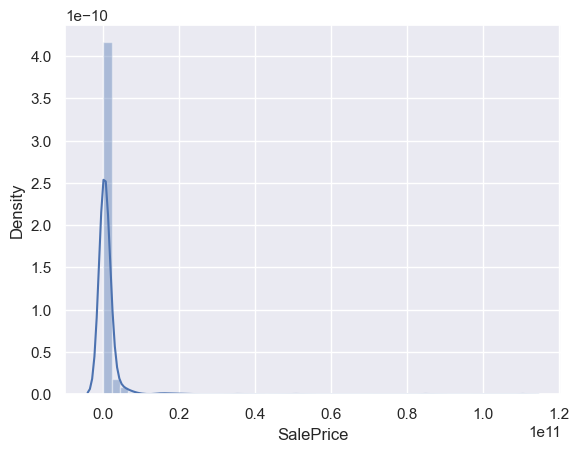

In [76]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error);

There are examples with large residuals. Let's drop them from the training set. For instance, drop the examples with residuals greater than 0.95-quantile.

In [78]:
mask = (error < np.quantile(error, 0.95))

In [79]:
model = Lasso().fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred))

Test RMSE = 1367074818.1835


In [80]:
X_train = X_train[mask]
y_train = y_train[mask]

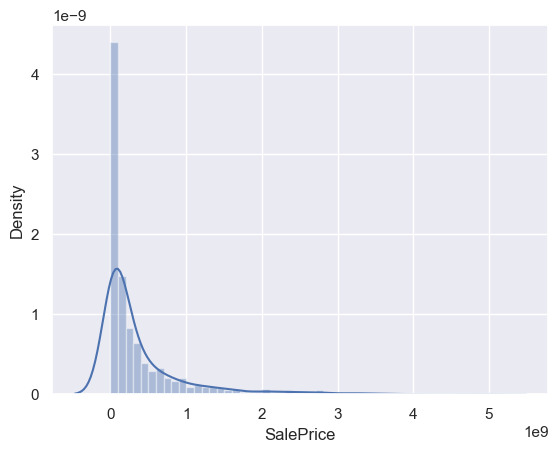

In [82]:
error = (y_train[mask] - model.predict(X_train[mask])) ** 2
sns.distplot(error);

## Today:
* Iris 2-class classification with logistic regression
* Classification metrics
* Data imbalance handling

#### Import packages:

In [83]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

#### Load the dataset:

In [84]:
X, Y = sklearn.datasets.load_iris(return_X_y=True)
names = ['sepal length', 'sepal width', 'petal length', 'petal width']
classes = ['setosa', 'versicolor', 'virginica']

#create pandas data structure
data = pd.concat([pd.DataFrame(X, columns=names), pd.DataFrame(Y, columns=['target'])], axis=1)
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Target variable is already encoded:
    * 0 - Setosa
    * 1 - Versicolor
    * 2 - Verginica
    
<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width=70%>

We will start from binary classification problem, for this purposes we will built a model to **classify Versicolor and Verginica** flowers

Let's cut Setosa from the data and change target variable values so that :
* Versicolor encoded as 0
* Virginica encoded as 1

In [87]:
dt = data[data.target != 0]
dt.target = dt.target - 1
dt.head()

,sepal length,sepal width,petal length,petal width,target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


#### Data statistics:

In [88]:
dt.describe()

,sepal length,sepal width,petal length,petal width,target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


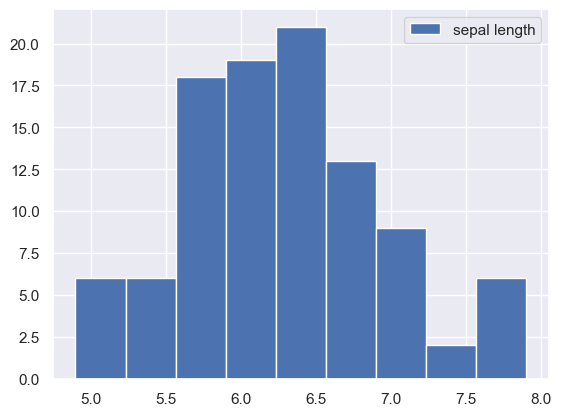

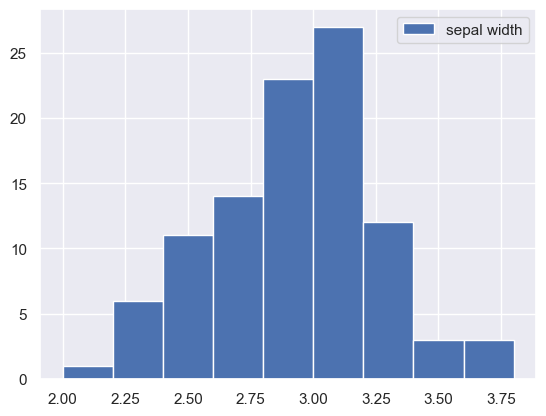

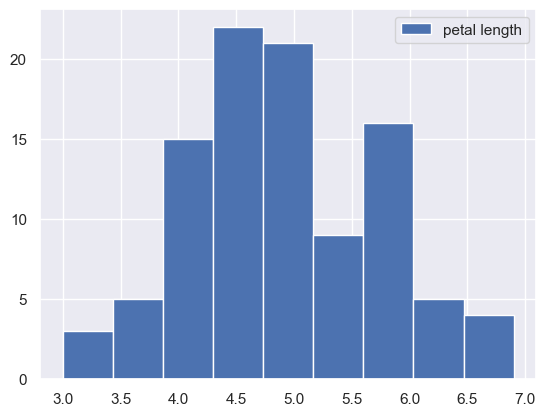

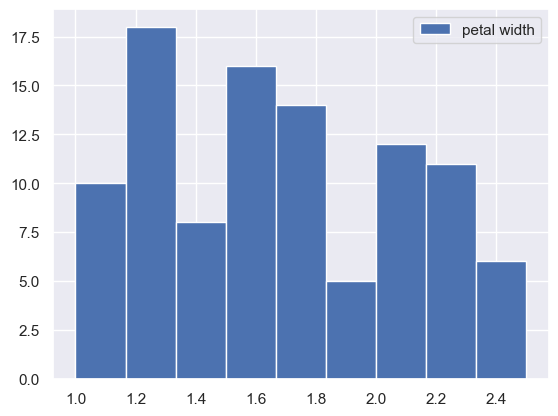

In [89]:
for name in names:
    dt[name].hist(bins=9, label=name)
    plt.legend()
    plt.show()

#### Correlation:

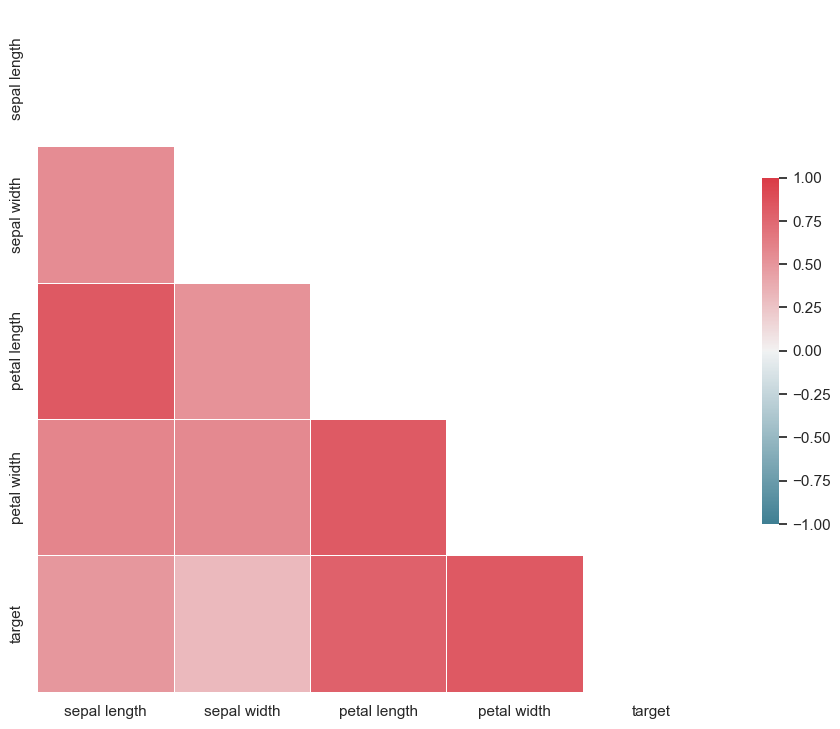

In [90]:
sns.set(style="white")

# Compute the correlation matrix
corr = dt.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

#### Another nice plots:

In [ ]:
#where correlation is best?

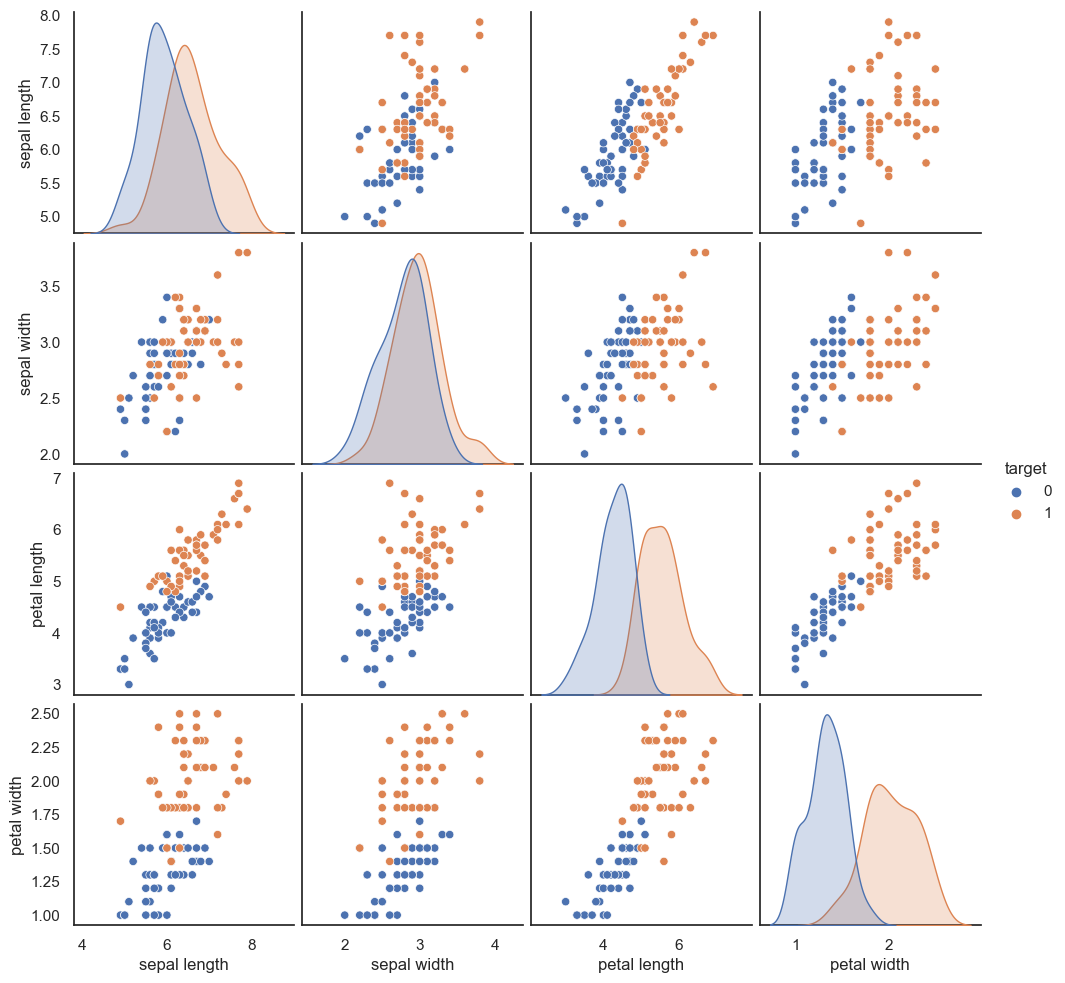

In [91]:
sns.pairplot(dt, kind='scatter', hue='target')
plt.show()

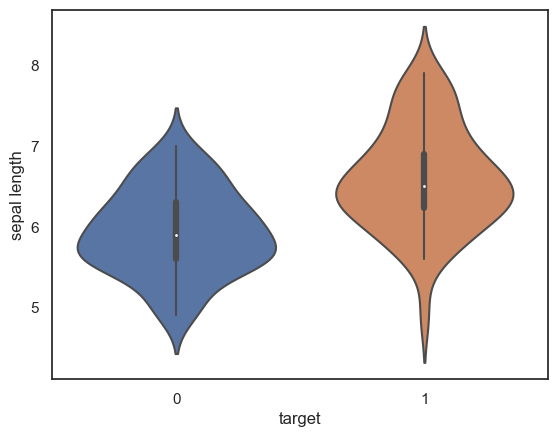

In [92]:
sns.violinplot( x=dt["target"], y=dt["sepal length"])
plt.show()

#### Check rank of the features matrix:

In [93]:
np.linalg.matrix_rank(dt.drop('target', axis=1))

4

#### Logistic Regression Model

In [94]:
#from sklearn import metrics 
logit = sm.Logit((dt.target).values, dt.drop('target', axis=1))
result = logit.fit()
preds=result.predict(dt.drop('target', axis=1)).values

preds_classes = np.ones(preds.shape[0])
preds_classes[preds<0.5] = 0

# calculate accuracy
accuracy_score(dt.target, preds_classes)

Optimization terminated successfully.
         Current function value: 0.108399
         Iterations 10


0.95

#### Question: what is the difference between L1 and L2 regularization?

**Logistic regression with L1 regularization**

In [96]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l1', solver='liblinear').fit(dt.drop('target', axis=1), dt.target)
preds=model.predict(dt.drop('target', axis=1))
accuracy_score(dt.target, preds)

0.95

**Logistic regression with L2 regularization**

In [97]:
from sklearn import linear_model
model=sklearn.linear_model.LogisticRegression(penalty='l2').fit(dt.drop('target', axis=1), dt.target)
preds=model.predict(dt.drop('target', axis=1))
accuracy_score(dt.target, preds)

0.96

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

In [98]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for solver in solvers:
    model = sklearn.linear_model.LogisticRegression(
        penalty='l2', solver=solver, fit_intercept=True
    ).fit(dt.drop('target', axis=1), dt.target)
    
    preds = model.predict(dt.drop('target', axis=1))
    preds_proba = model.predict_proba(dt.drop('target', axis=1))
    print(solver, accuracy_score(dt.target, preds))

newton-cg 0.96
sag 0.97
saga 0.97
lbfgs 0.96


### Plot pairvise decision boundaries

In [99]:
def plot_decision_boundaries(feature_1, feature_2):
    # create meshgrid
    xx, yy = np.mgrid[feature_1.min():feature_1.max():.01, feature_2.min():feature_2.max():.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # set up and fit the model
    model = sklearn.linear_model.LogisticRegression().fit(dt[[feature_1.name, feature_2.name]], dt.target)
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    
    # make plots
    f, ax = plt.subplots(figsize=(15, 6))
    contour = ax.contourf(xx, yy, probs, 200, cmap="RdBu")
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")

    ax.scatter(feature_1, feature_2, c=dt.target, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
       xlim=(feature_1.min(), feature_1.max()), ylim=(feature_2.min(), feature_2.max()),
       xlabel=str(feature_1.name), ylabel=str(feature_2.name))

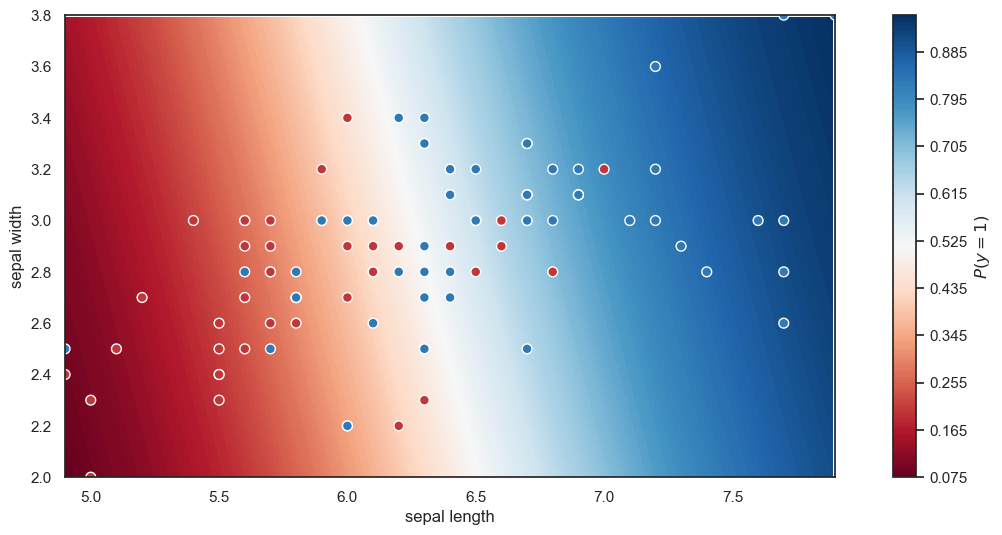

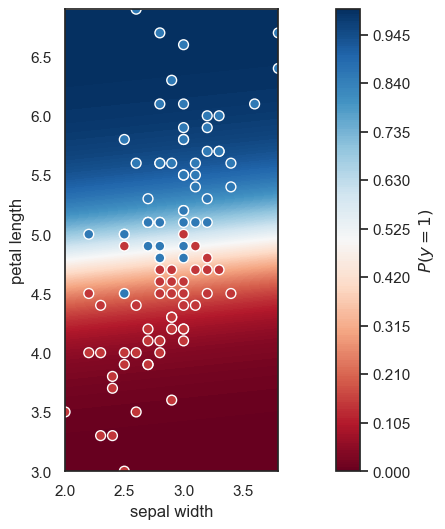

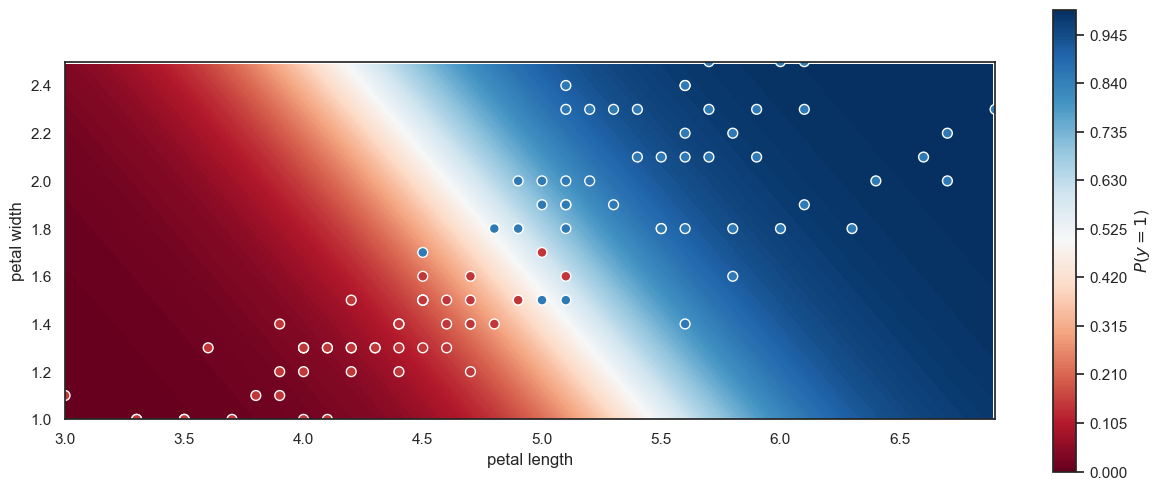

In [20]:
for i in range(dt.shape[1]-2):
    plot_decision_boundaries(dt.iloc[:, i], dt.iloc[:, i+1])

### Analysing the results

As we can see, logreg with L2 regularization has the best accuracy score 0.97.

But, what accuracy score actualy mean?

## Classification metrics: confusion matrix

<img src="https://image.jimcdn.com/app/cms/image/transf/dimension=1920x10000:format=png/path/s8ff3310143614e07/image/iab2d53abc26a2bc7/version/1549760945/image.png" width=120%>

**Accuracy score** - is a ratio of accurately classified data points.

In [21]:
(preds == dt.target).sum() / dt.target.shape[0]

0.96

In [22]:
def my_accuracy_score(y_true, y_pred):
    my_acc = (y_true==y_pred).sum() / y_true.shape[0]
    return my_acc

In [23]:
my_accuracy_score(dt.target, preds)

0.96

* **Prevalence** - a ratio of class 1 objects among all objects

In [ ]:
# your code goes here

In [24]:
prevalence = dt.target.sum() / dt.target.shape[0]
prevalence

0.5

* **True positives** - a number of correctly classified objects of class 1

In [25]:
tp = ((preds == 1) * (dt.target == 1)).sum()
tp

49

* **True negatives** - a number of correctly classified objects of class 0

In [26]:
tn = ((preds == 0) * (dt.target == 0)).sum()
tn

47

* **False positives** - a number of wrongly classified objects of class 0, i.e. objects are classified as class 1 while actually belong to class 0 

In [ ]:
# your code goes here

In [27]:
fp = ((preds == 1) * (dt.target == 0)).sum()
fp

3

* **False negatives** - a number of wrongly classified objects of class 1, i.e. objects are classified as class 0 while actually belong to class 0 

In [ ]:
# your code goes here

In [28]:
fn = ((preds == 0) * (dt.target == 1)).sum()
fn

1

* **Condition Positive** - a number of objects that actually belong to class 1

In [ ]:
# your code goes here

In [29]:
condition_positive = (dt.target == 1).sum()
condition_positive

50

* **Condition Negative** - a number of objects that actually belong to class 0

In [ ]:
# your code goes here

In [30]:
condition_negative = (dt.target == 1).sum()
condition_negative

50

* **Predicted Condition Positive** - a number of objects that is predicted to belong to class 1

In [ ]:
# your code goes here

In [31]:
predicted_cp = (preds==1).sum()
predicted_cp

52

* **Predicted Condition Negative** - a number of objects that is predicted to belong to class 0

In [ ]:
# your code goes here

In [32]:
predicted_cn = (preds==0).sum()
predicted_cn

48

* **TPR** (the same as) **True Positive Rate** (the same as) **Recall** (the same as) **Sensitivity** (the same as) **Probability of detection** - a ratio of correctly classified class 1 objects among all class 1 objects

In [ ]:
# your code goes here

In [33]:
tpr = tp / condition_positive
tpr

0.98

* **TNR** (the same as) **True Negative Rate** (the same as) **Specificity** (the same as) **Selectivity** - a ratio of correctly classified class 0 objects among all class 0 objects

In [ ]:
# your code goes here

In [34]:
tnr = tn / condition_negative
tnr

0.94

* **FNR** (the same as) **False Negative Rate** (the same as) **Miss rate** - a ratio of wrongly classified class 1 objects among all class 1 objects

In [ ]:
# your code goes here

In [35]:
fnr = fn / condition_positive
fnr

0.02

* **FPR** (the same as) **False Positive Rate** (the same as) **Fall-out** (the same as) **Probability of false alarm** - a ratio of wrongly classified class 0 objects among all class 0 objects

In [ ]:
# your code goes here

In [36]:
fpr = fp / condition_negative
fpr

0.06

* **Precision** (the same as) **Positive Predictive Value** (the same as) **PPV** - a ratio of correctly classified class 1 objects among all predicted as class 1 objects

In [ ]:
# your code goes here

In [37]:
precision = tp / predicted_cp
precision

0.9423076923076923

* **NPV** (the same as) **Negative Predictive Value** - a ratio of correctly classified class 0 objects among all predicted as class 0 objects

In [ ]:
# your code goes here

In [38]:
npv = tn / predicted_cn
npv

0.9791666666666666

* **False Omission Rate** (the same as) **FOR** - a ratio of wrongly classified objects of class 1 among all predicted as class 0 objects

In [ ]:
# your code goes here

In [39]:
fo_rate = fn / predicted_cn
fo_rate

0.020833333333333332

* **False Discovery Rate** (the same as) **FDR** - a ratio of wrongly classified objects of class 0 among all predicted as class 1 objects

In [ ]:
# your code goes here

In [40]:
fd_rate = fp / predicted_cp
fd_rate

0.057692307692307696

* **Positive Likelihood Ratio** 

$$LR+ = \frac{TPR}{FPR}$$

In [ ]:
# your code goes here

In [41]:
lr_positive = tpr / fpr
lr_positive

16.333333333333332

* **Negative Likelihood Ratio** 

$$LR- = \frac{FNR}{TNR}$$

In [ ]:
# your code goes here

In [60]:
lr_negative = fnr / tnr
lr_negative

0.021276595744680854

* **Diagnostic Odds Ratio** 

$$DOR = \frac{LR+}{LR-}$$

In [ ]:
# your code goes here

In [61]:
dor = lr_positive / lr_negative
dor

767.6666666666665

* **F1 score** is a harmonic mean between **Precision** and **Recall** 

$$F_{1} score = 2\frac{Precision \cdot Recall}{Precision + Recall}$$

In [ ]:
# your code goes here

In [42]:
f1_score = 2 * precision * tpr / (precision + tpr)
f1_score

0.9607843137254902

In [43]:
# check
sklearn.metrics.f1_score(dt.target, preds)

0.9607843137254902

* **$F_{\beta}$ score** - a more general F score that uses a positive real factor β, where β is chosen such that recall is considered β times as important as precision

$$F_{\beta} score = (1 + \beta^2)\frac{Precision \cdot Recall}{\beta^2 Precision + Recall}$$

In [ ]:
# your code goes here

In [ ]:
def f_beta_score(beta, precision, recall):
    fb = (1 + beta**2) * precision * recall / (beta * beta * precision + recall)
    return fb

### ROC curve

* ROC curve - is a function TPR(FPR), it shows how the probability of correct classification on positive classes ("recognition rate") changes with probability of incorrect classification on negative classes ("false alarm"). 
* It is build as a set of points TPR($\mu$), FPR($\mu$).
* If $\mu \downarrow$ , the algorithm predicts $\omega_{1}$ more often and
    * TPR=$1-\varepsilon_{1}$ $\uparrow$
    * FPR=$\varepsilon_{2}$ $\uparrow$

* Characterizes classification accuracy for different $\mu$.
    * more concave ROC curves are better

* $TPR = \frac{TP}{TP + FN}=\frac{TP}{Pos}$
* $FPR = \frac{FP}{FP + TN} = \frac{FP}{Neg}$

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}

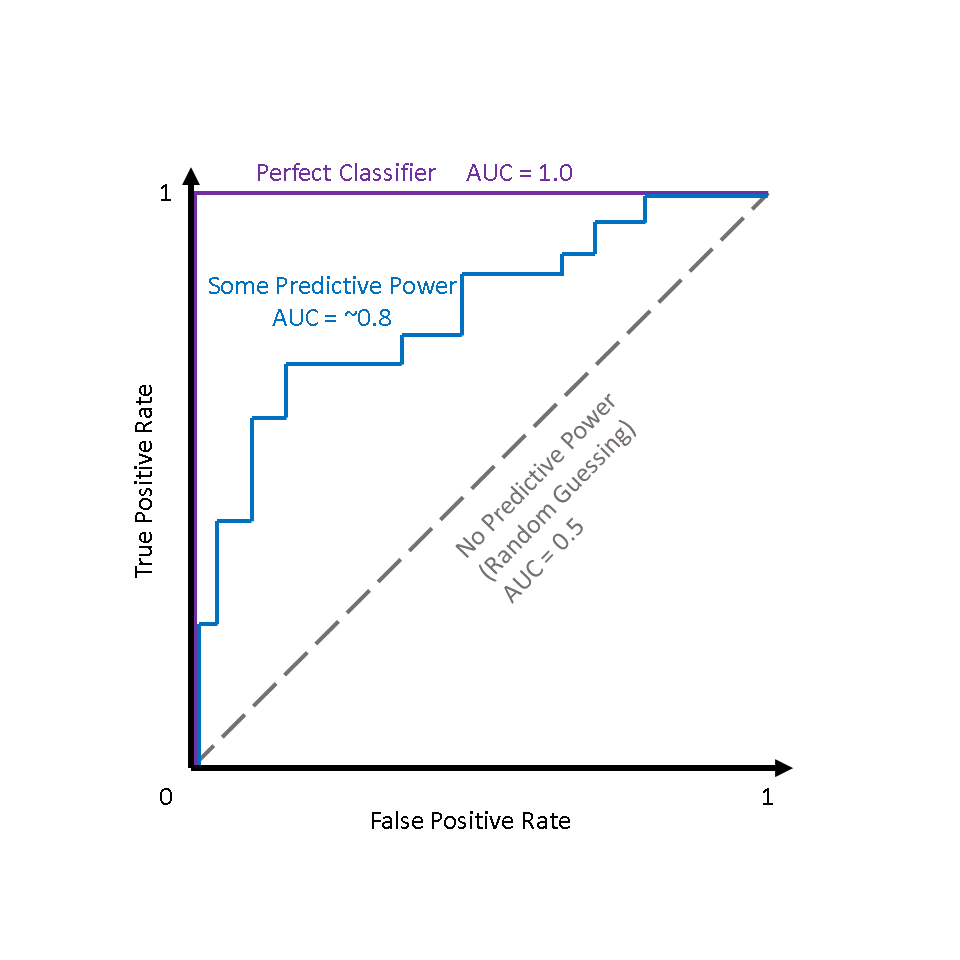

https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb

### ROC-AUC
* Area under the ROC curve

* Global quality characteristic for different $\mu$
* AUC$\in[0,1]$
    * AUC = 0.5 - equivalent to random guessing
    * AUC = 1 - no errors classification.

* AUC property: it is equal to probability that for 2 random objects $x_{1}\in \text{"+"}$ and $x_{2}\in \text{"-"}$ it will hold that: $\widehat{p}(+|x_{1})>\widehat{p}(+|x_2)$

* What about unbalanced case?

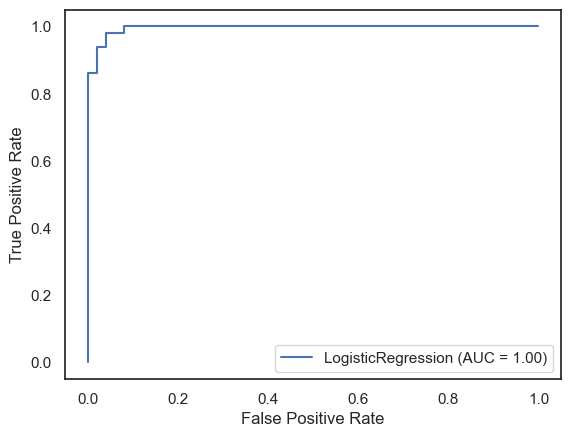

In [100]:
sklearn.metrics.plot_roc_curve(model, dt.drop('target', axis=1), dt.target)  
plt.show()

In [101]:
sklearn.metrics.roc_auc_score(dt.target, preds_proba[:, 1])

0.9952000000000001

## Handling Imbalance in Data

A dataset is said to be **imbalanced** when there is a significant, or in some cases extreme, disproportion among the number of examples of each class

When this is the case, accuracy score is not an effective and indicative measure of model perfomance.

What we can do in this case?

* Make a dataset balanced
* Use more representative metrics (ROC_AUC, $F_\beta$ score, Recall, Specificity etc.)
* Give proportional weights to classes inside the model (it is possible for some sklearn models, gradient boosting and neural network libraries)  

Today we will learn how to make a dataset artificially balanced. There are a number of such a techniques:
    
* Under-sampling the majority class(es)
* Over-sampling the minority class
* Combining over- and under-sampling
* Create ensemble balanced sets

<a href="https://pypi.org/project/imbalanced-learn/">ImbLearn</a> - a library for resampling, contains a large number of SMOTE methods

In [ ]:
!pip install imblearn --user --quiet

In [48]:
import imblearn

### Undersampling with NearMiss

In [102]:
#Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
#License: MIT

from collections import Counter

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

#Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 25, 1: 50, 2: 50},
    random_state=RANDOM_STATE,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

#Create a pipeline
pipeline = make_pipeline(
    NearMiss(version=2), StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

#Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Automatically created module for IPython interactive environment
Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.88      0.58      0.95      0.70      0.74      0.53        12
          2       0.69      0.92      0.75      0.79      0.83      0.70        12

avg / total       0.84      0.81      0.89      0.81      0.84      0.71        32



### OverSampling with RandomOverSampler

In [103]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

#Create a pipeline
pipeline = make_pipeline(
    RandomOverSampler(), StandardScaler(), LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

#Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.92      0.92      0.95      0.92      0.93      0.87        12
          2       0.92      0.92      0.95      0.92      0.93      0.87        12

avg / total       0.94      0.94      0.96      0.94      0.95      0.90        32

